# 0. Start

import package & utils

In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
import os
import myutils
import urx

Images

In [2]:
images_files = myutils.ls("src/")
images = [cv2.imread(img,1)[:,:,::-1] for img in images_files]

# 1. Kamera Kalibrierung

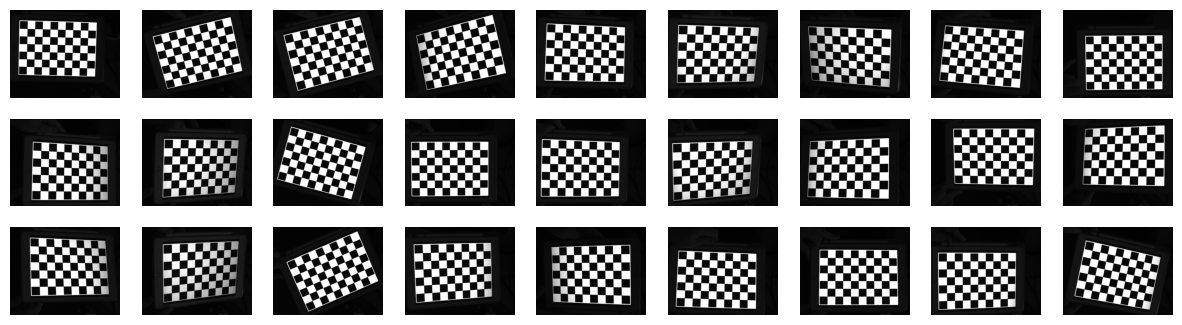

In [3]:
kalibrierung_files = myutils.ls("kalibrierung/")
muster = [cv2.imread(img,1)[:,:,::-1] for img in kalibrierung_files]

fig=plt.figure(figsize=(15, 4))
for i in range (len(muster)):
    fig.add_subplot(3, 9, i+1)
    plt.imshow(muster[i], cmap = "gray")
    plt.axis('off')
plt.show()

In [4]:
a =9
b = (a==9)*9
print (b)

9


In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
w = 9   # 10 - 1
h = 6   # 7  - 1
objp = np.zeros((w*h,3), np.float32)
objp[:,:2] = np.mgrid[0:w,0:h].T.reshape(-1,2)
objp = objp*18.1  # 18.1 mm
objpoints = []
imgpoints = []
images_k = glob.glob(r'kalibrierung/*.png')

i=0
for fname in images_k:
    img = cv2.imread(fname)
    h1, w1 = img.shape[0], img.shape[1]
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    u, v = img.shape[:2]
    ret, corners = cv2.findChessboardCorners(gray, (w,h),None)
    if ret == True:
        # print("i:", i)
        i = i+1
        cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (w,h), corners, ret)
        cv2.namedWindow('findCorners', cv2.WINDOW_NORMAL)
        cv2.resizeWindow('findCorners', 640, 480)
        cv2.imshow('findCorners',img)
        cv2.waitKey(200)
cv2.destroyAllWindows()
# print('rechnen')
ret, mtx, dist, rvecs, tvecs = \
    cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# print("ret:",ret)
print("mtx:\n",mtx)
print("Verzerrung:\n",dist   )   # distortion cofficients = (k_1,k_2,p_1,p_2,k_3)
print("rvecs(i=0):\n",rvecs[0])
print("tvecs(i=0):\n",tvecs[0]) 
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (u, v), 0, (u, v))
print('newcameramtx',newcameramtx)

mtx:
 [[3.08572425e+03 0.00000000e+00 6.21399833e+02]
 [0.00000000e+00 3.08667037e+03 5.25161929e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Verzerrung:
 [[-1.62497586e-01 -6.85496159e-01  7.51415608e-04  5.35846204e-04
   2.68824360e+01]]
rvecs(i=0):
 [[ 0.05841109]
 [-0.03477005]
 [ 0.02600298]]
tvecs(i=0):
 [[-85.10820255]
 [-62.2917602 ]
 [626.76949323]]
newcameramtx [[3.08589233e+03 0.00000000e+00 6.19290723e+02]
 [0.00000000e+00 3.08514355e+03 5.27566226e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [6]:
def kali_n(n):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    w = 9   # 10 - 1
    h = 6   # 7  - 1
    objp = np.zeros((w*h,3), np.float32)
    objp[:,:2] = np.mgrid[0:w,0:h].T.reshape(-1,2)
    objp = objp*18.1  # 18.1 mm
    objpoints = []
    imgpoints = []
    images_k = glob.glob(r'kalibrierung/*.png')

    i=0
    for fname in images_k[:n]:
        img = cv2.imread(fname)
        h1, w1 = img.shape[0], img.shape[1]
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        u, v = img.shape[:2]
        ret, corners = cv2.findChessboardCorners(gray, (w,h),None)
        if ret == True:
            # print("i:", i)
            i = i+1
            cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
            objpoints.append(objp)
            imgpoints.append(corners)
            cv2.drawChessboardCorners(img, (w,h), corners, ret)
            cv2.namedWindow('findCorners', cv2.WINDOW_NORMAL)
            cv2.resizeWindow('findCorners', 640, 480)
            cv2.imshow('findCorners',img)
            cv2.waitKey(200)
    cv2.destroyAllWindows()

    ret, mtx, dist, rvecs, tvecs = \
        cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (u, v), 0, (u, v))
    return dist[0], [newcameramtx[0][0], newcameramtx[1][1], newcameramtx[0][2], newcameramtx[1][2]]

In [17]:
def para_stu(n):
    x = []
    cam = []
    y = np.linspace(3,n,n-2)
    for i in range(3,n+1):
        tmp,tmp2 = kali_n(i)
        x.append(tmp)
        cam.append(tmp2)
    return x,y,cam

In [ ]:
x,y,cam = para_stu(len(images_k))

KeyboardInterrupt: 

In [ ]:
x = np.array(x)
x_new = x[11:,:]
y_new = y[11:]
x_re = []
x_mean = np.mean(x_new,axis=0)
for i in range(len(y_new)):
    x_ae = np.abs(x_new[i,:] - x_mean)
    x_re.append(np.abs(x_ae / x_mean))
x_re = np.array(x_re)


In [ ]:
cam = np.array(cam)
cam_new = cam[11:,:]
cam_re = []
cam_ae_list = []
cam_mean = np.mean(cam_new,axis=0)
for i in range(len(y_new)):
    cam_ae = np.abs(cam_new[i,:] - cam_mean)
    cam_ae_list.append(cam_ae)
    cam_re.append(np.abs(cam_ae / cam_mean))
cam_re = np.array(cam_re)
cam_ae_list = np.array(cam_ae_list)


Text(0.5, 1.0, 'focal length')

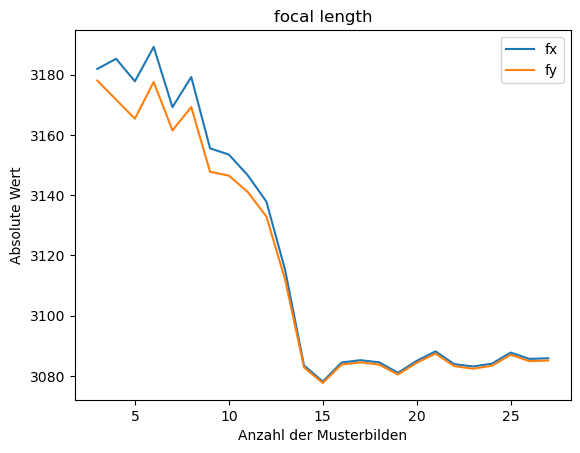

In [ ]:
label = ['fx','fy']
plt.plot(y,cam[:,:2],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('focal length')

Text(0.5, 1.0, 'principal point')

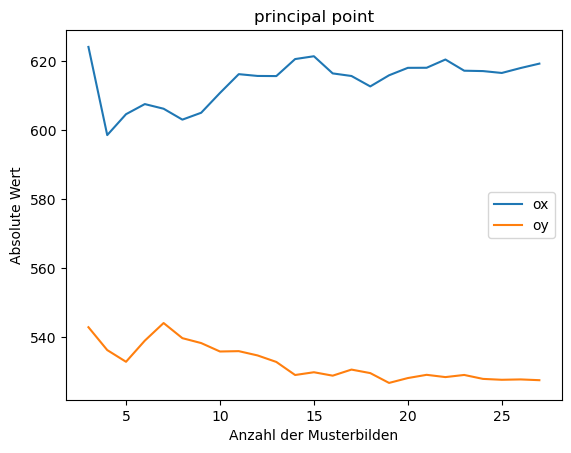

In [ ]:
label = ['ox','oy']
plt.plot(y,cam[:,2:],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('principal point')

Text(0.5, 1.0, 'Relativer Fehler für f(x,y)')

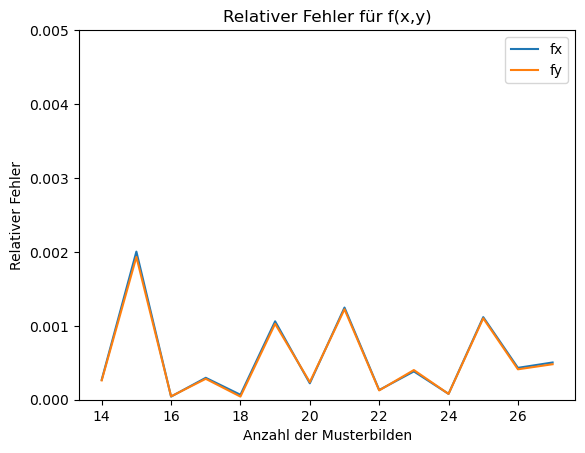

In [15]:
label = ['fx','fy']
plt.plot(y_new,cam_re[:,:2],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylim((0,0.005))
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler für f(x,y)')

Text(0.5, 1.0, 'Absoluter Fehler für o(x,y)')

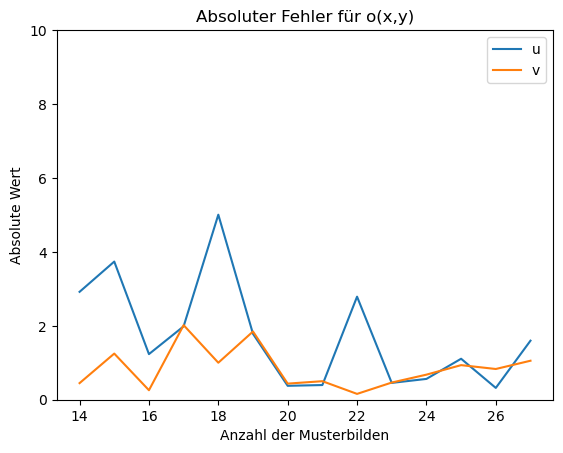

In [16]:
label = ['u','v']
plt.plot(y_new,cam_ae_list[:,2:],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
plt.ylim((0,10))
# plt.yscale('log')
plt.title('Absoluter Fehler für o(x,y)')

Text(0.5, 1.0, 'Koeffizienten der Verzerrung')

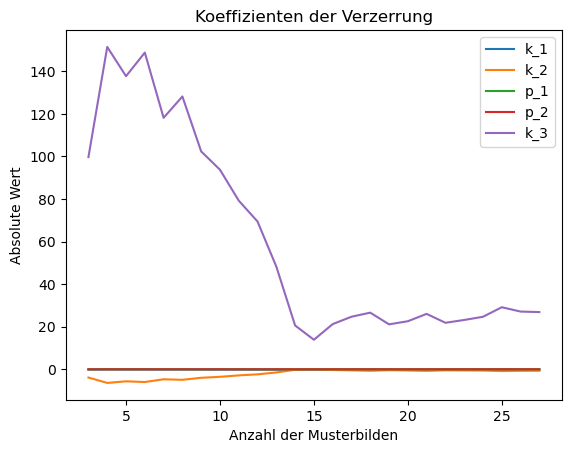

In [17]:
label = ['k_1','k_2','p_1','p_2','k_3']
plt.plot(y,x,label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('Koeffizienten der Verzerrung')

Text(0.5, 1.0, 'Koeffizienten der Verzerrung')

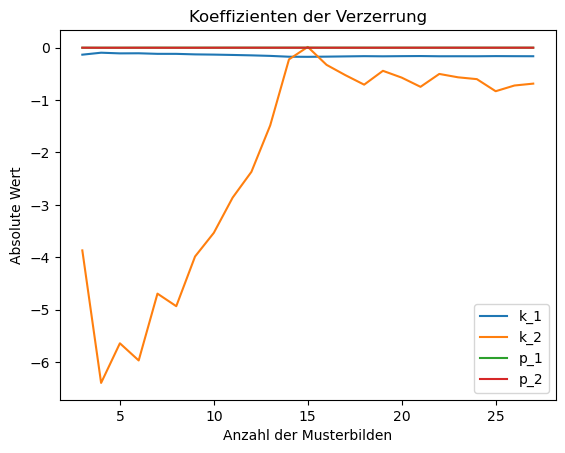

In [18]:
label = ['k_1','k_2','p_1','p_2']
plt.plot(y,x[:,:4],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Absolute Wert')
# plt.yscale('log')
plt.title('Koeffizienten der Verzerrung')

Text(0.5, 1.0, 'Relativer Fehler der Verzerrung')

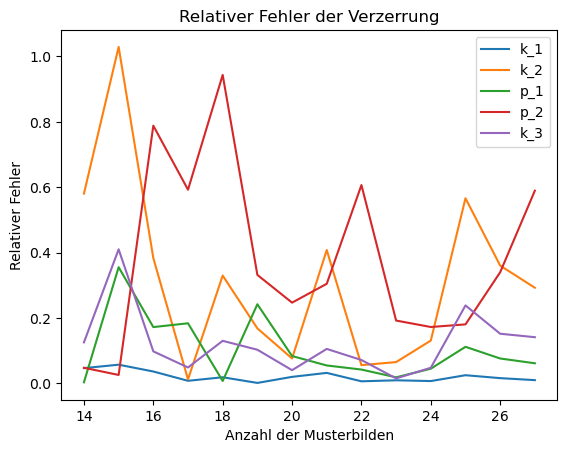

In [19]:
label = ['k_1','k_2','p_1','p_2','k_3']
plt.plot(y_new,x_re,label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Verzerrung')

Text(0.5, 1.0, 'Relativer Fehler der Koeffizient k_1')

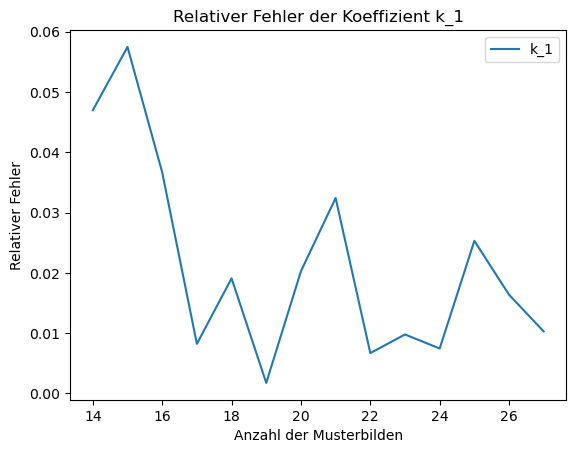

In [20]:
label = 'k_1'
plt.plot(y_new,x_re[:,0:1],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Koeffizient k_1')

Text(0.5, 1.0, 'Relativer Fehler der Koeffizient k_2')

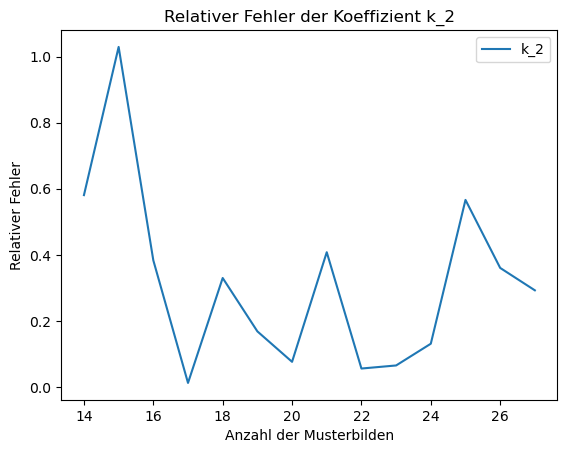

In [21]:
label = 'k_2'
plt.plot(y_new,x_re[:,1:2],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Koeffizient k_2')

Text(0.5, 1.0, 'Relativer Fehler der Koeffizient k_3')

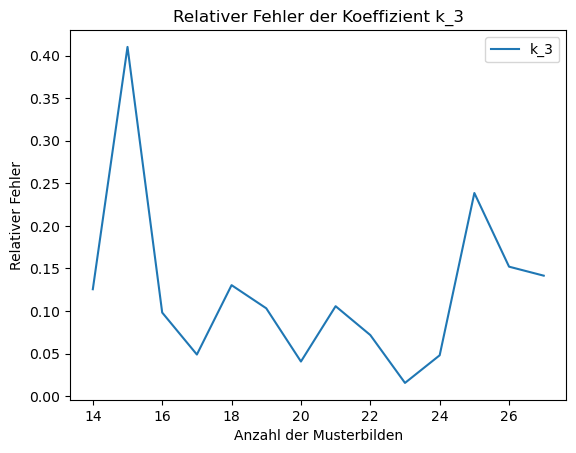

In [22]:
label = 'k_3'
plt.plot(y_new,x_re[:,4:],label=label)
plt.legend()
plt.xlabel('Anzahl der Musterbilden')
plt.ylabel('Relativer Fehler')
# plt.yscale('log')
plt.title('Relativer Fehler der Koeffizient k_3')

Verzerrung zurückgehen

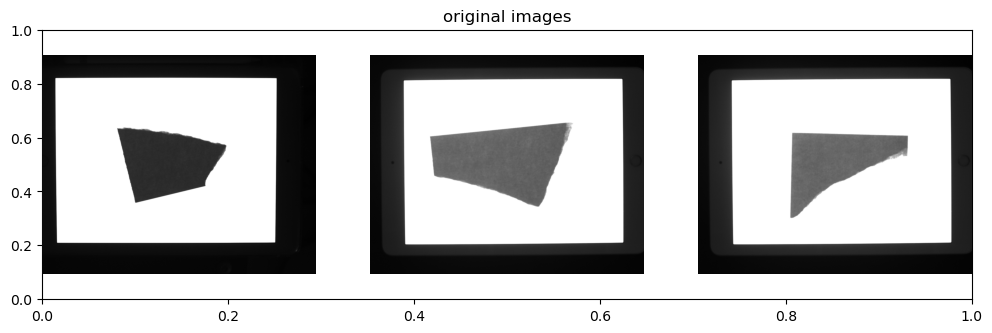

In [7]:
fig=plt.figure(figsize=(12, 3.5))
plt.title("original images")
for i in range (len(images)):
    fig.add_subplot(1, len(images), i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.axis('off')
plt.show()

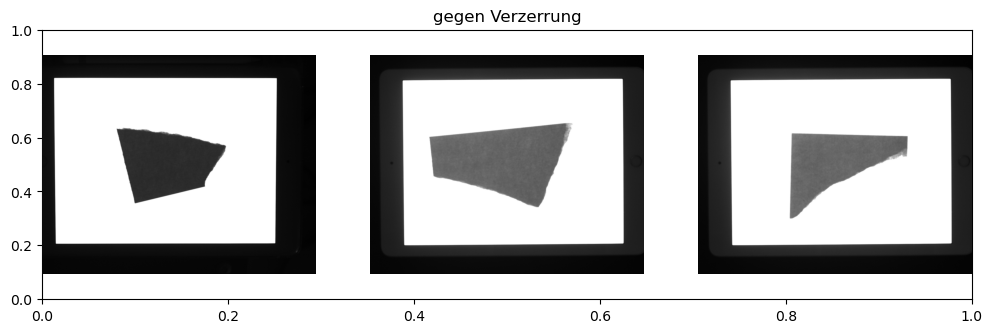

In [8]:
dst = []
for ele in images:
    tmp = cv2.undistort(ele, mtx, dist, None, newcameramtx)
    dst.append(tmp)


filter = 4
scale = 4
#iPad
wp=240*scale
hp =170*scale

fig=plt.figure(figsize=(12, 3.5))
plt.title("gegen Verzerrung")
for i in range (len(dst)):
    fig.add_subplot(1, len(dst), i+1)
    plt.imshow(dst[i], cmap = "gray")
    plt.axis('off')
plt.show()

# 2. Bildenverarbeitung

0.13653351291418075


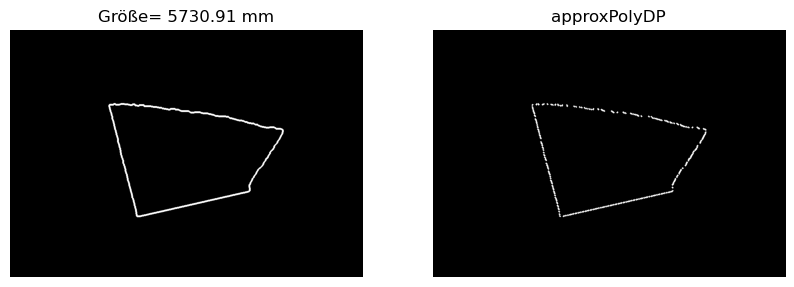

0.16805483322143555


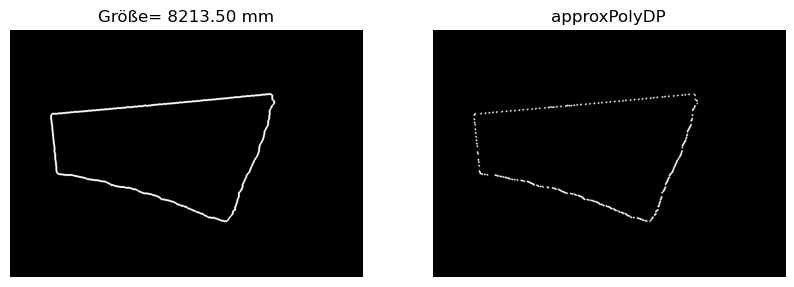

0.15970752435922622


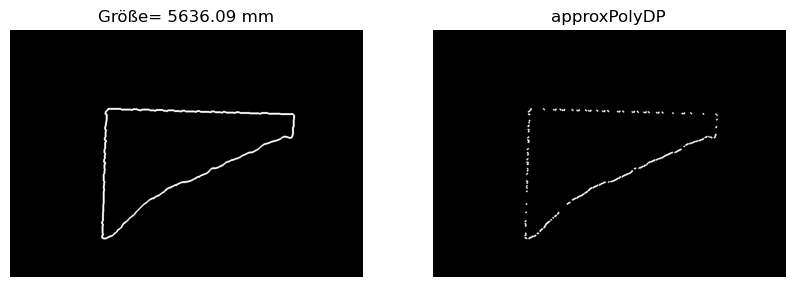

In [9]:
def multipleKontour(list):
    con_list = []
    for i in range(len(list)):

        c_img = myutils.vorbe(list[i])
        imgcon, cons, maxArea = myutils.boundingRect(c_img, filter)
        maxbox = cons[0][2]
        myutils.reorder(maxbox)
        w_img = myutils.warpImg(list[i], maxbox, wp, hp)
        
        w1_img = cv2.medianBlur(w_img,5)
        w2_img = cv2.bilateralFilter(w1_img, d = 50, sigmaColor= 10, sigmaSpace= 50)

        k2_img = myutils.kmeans(w2_img, 3)

        c2_img = cv2.Canny(k2_img,100,110)
        kernel = np.ones((5,5))
        c2_img = cv2.dilate(c2_img,kernel,iterations=2) #dilatieren
        c2_img = cv2.erode(c2_img,kernel,iterations=1) #erodieren
        fig=plt.figure(figsize=(10, 10))
        fig.add_subplot(1, 2, 1)
        con = myutils.print_inner_cons(c2_img, 1000, scale)
        fig.add_subplot(1, 2, 2)
        con2 = myutils.print_approx_cons(c2_img, 1000, scale)
        con_list.append(con2)
        plt.show()

    return con_list

con_list = multipleKontour(dst)

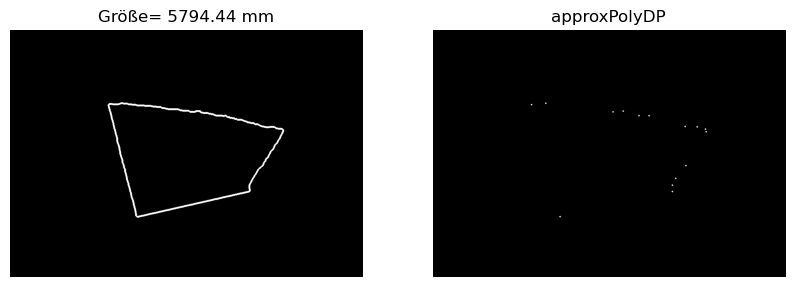

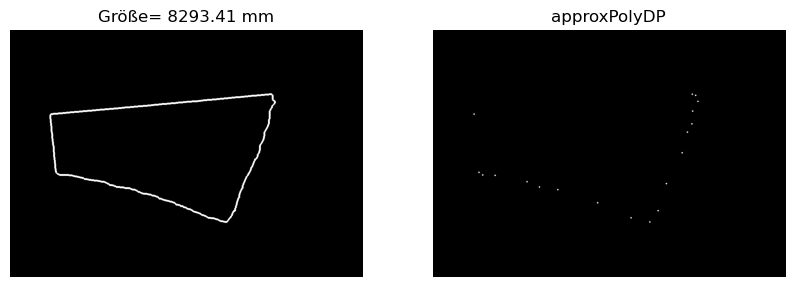

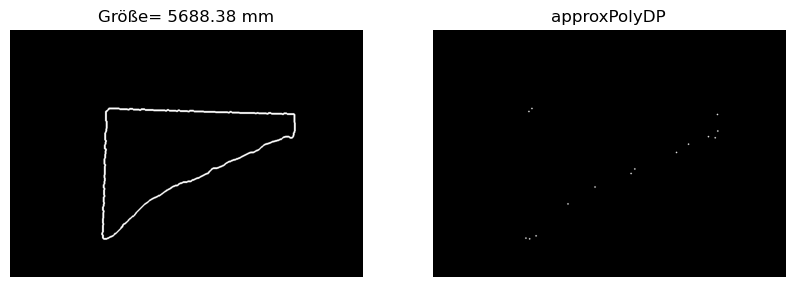

In [12]:
con_list = multipleKontour(images)

In [24]:
con = con_list[2]
print(con[0])
# print(con)
con = [ele[0]/scale/1000 for ele in con]
print(con)


[[245 555]]
[array([0.06125, 0.13875]), array([0.06125, 0.13725]), array([0.0615, 0.137 ]), array([0.06175, 0.137  ]), array([0.06175, 0.136  ]), array([0.0615 , 0.13575]), array([0.0615, 0.131 ]), array([0.06175, 0.13075]), array([0.06175, 0.12975]), array([0.0615 , 0.12975]), array([0.06125, 0.1295 ]), array([0.06125, 0.128  ]), array([0.06175, 0.1275 ]), array([0.06175, 0.122  ]), array([0.062  , 0.12175]), array([0.062 , 0.1165]), array([0.06225, 0.11625]), array([0.06225, 0.108  ]), array([0.0625 , 0.10775]), array([0.0625 , 0.10575]), array([0.06225, 0.1055 ]), array([0.06225, 0.1045 ]), array([0.0625 , 0.10425]), array([0.0625, 0.1025]), array([0.06275, 0.10225]), array([0.06275, 0.10125]), array([0.0625 , 0.10125]), array([0.06225, 0.101  ]), array([0.06225, 0.0965 ]), array([0.06275, 0.096  ]), array([0.06275, 0.09425]), array([0.063, 0.094]), array([0.063, 0.093]), array([0.06275, 0.09275]), array([0.06275, 0.09   ]), array([0.063  , 0.08975]), array([0.06325, 0.08975]), arra

# 3. Bahnplannung

Robot verbinden

get_inverse_kin()

In [25]:
rob = urx.Robot("192.168.0.100", use_rt=True)
rob.set_tcp((0, 0, 0.08, 0, 0, 0))
rob.set_payload(2, (0, 0, 0.1))
rob.set_gravity((0, 0, 9.81))
pi = np.pi

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1420
Exception in thread Thread-9:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "g:\Anacon\lib\site-packages\urx\urrtmon.py", line 402, in run
    self.__recv_rt_data()
  File "g:\Anacon\lib\site-packages\urx\urrtmon.py", line 286, in __recv_rt_data
    if self.urFirm >= 3.1:
TypeError: '>=' not supported between instances of 'NoneType' and 'float'


In [26]:
def rob_init():
    tmpj = rob.getj()
    tmp1 = tmpj[0]
    tmp5 = tmpj[5]
    tmpj = (np.array(tmpj) //10 + 0.5) * pi
    tmpj[0] = tmp1
    tmpj[5] = tmp5
    return tmpj

In [29]:
initj = rob_init()
rob.movej(initj, 0.1, 0.09)

[1.1682912111282349,
 -1.5709765593158167,
 -1.5707247892962855,
 -1.5711200873004358,
 1.5707660913467407,
 0.38952213525772095]

In [28]:
# k2m = (tvecs[0][0][0]/100,tvecs[0][1][0]/100,tvecs[0][2][0]/100)
# print(k2m)

# laser
pose = rob.getl()
x_b, y_b = [0.2, 0.2]
b2m = (x_b, y_b) # x,y
# print(b2m)

m2img = ((0,1),(1,0))
# x_m = y_img
# y_m = x_img 

print(con) # Punkt in Pixelkoordinaten
# Transformation von Pixel in Roboterkoordinaten
con_new = [[x_b+(m2img[0][0]*ele[0]+m2img[0][1]*ele[1]), y_b+(m2img[1][0]*ele[0]+m2img[1][1]*ele[1])] for ele in con]
print(con_new) # Punkt in Roboterkoordinaten

[array([0.0615 , 0.13925]), array([0.06375, 0.05475]), array([0.06575, 0.05275]), array([0.18925, 0.05675]), array([0.1895 , 0.06825]), array([0.188  , 0.07225]), array([0.18225, 0.07175]), array([0.17  , 0.0765]), array([0.162, 0.082]), array([0.146, 0.088]), array([0.14075, 0.0915 ]), array([0.13425, 0.093  ]), array([0.13175, 0.096  ]), array([0.10775, 0.105  ]), array([0.0895, 0.1165]), array([0.0685, 0.1375])]
[[0.33925000000000005, 0.2615], [0.25475000000000003, 0.26375000000000004], [0.25275000000000003, 0.26575000000000004], [0.25675000000000003, 0.38925], [0.26825, 0.3895], [0.27225, 0.388], [0.27175, 0.38225], [0.2765, 0.37], [0.28200000000000003, 0.362], [0.28800000000000003, 0.346], [0.2915, 0.34075], [0.29300000000000004, 0.33425000000000005], [0.29600000000000004, 0.33175], [0.305, 0.30775], [0.3165, 0.2895], [0.3375, 0.2685]]


In [26]:
pose = rob.getl()
rx, ry, rz = pose[3:]

In [27]:
rob.movel([con_new[0][0], con_new[0][1], 0.1154, rx, ry, rz], 0.1, 0.05)

<Transform:
<Orientation: 
array([[ 7.05480023e-01, -7.08729803e-01,  4.96845793e-05],
       [-7.08729805e-01, -7.05480020e-01,  7.37282745e-05],
       [-1.72019475e-05, -8.72267670e-05, -9.99999996e-01]])>
<Vector: (0.33927, 0.26145, 0.11545)>
>

In [29]:
import time

# 假设rob是你的机器人对象
for i in range(len(con_new)):
    target_pose = [con_new[i][0], con_new[i][1], 0.1, rx, ry, rz]
    current_pose = rob.getl()  # 获得当前笛卡尔坐标

    pose_deltas = [t - c for t, c in zip(target_pose, current_pose)]  # 计算每个坐标需要移动的距离
    time_to_move = 30  # 假设我们想要在0.5秒内完成移动
    pose_speeds = [delta / time_to_move for delta in pose_deltas]  # 计算每个坐标的速度

    rob.speedl(pose_speeds, acc=0.1, min_time=time_to_move)  # 执行移动

    time.sleep(time_to_move)  # 等待移动完成

    print('%i ist fertig' % i)



Robot not running: {'size': 47, 'type': 0, 'timestamp': 10192464000, 'isRobotConnected': True, 'isRealRobotEnabled': True, 'isPowerOnRobot': True, 'isEmergencyStopped': True, 'isSecurityStopped': False, 'isProgramRunning': False, 'isProgramPaused': True, 'robotMode': 4, 'controlMode': 0, 'speedFraction': 1.0, 'speedScaling': 0.0, 'speedFractionLimit': b'?'}


KeyboardInterrupt: 

In [19]:
for i in range(len(con_new)):
    rob.movel([con_new[i][0], con_new[i][1], 0.1, rx, ry, rz], 0.005, 0.005)
    print ('%i ist fertig' %i)
rob.movel([con_new[0][0], con_new[0][1], 0.1, rx, ry, rz], 0.05, 0.05)
print ('fertig')

0 ist fertig
1 ist fertig
2 ist fertig
3 ist fertig
4 ist fertig
5 ist fertig
6 ist fertig
7 ist fertig
8 ist fertig
9 ist fertig
10 ist fertig
11 ist fertig
12 ist fertig
13 ist fertig
14 ist fertig
15 ist fertig
fertig


NameError: name 'rob' is not defined